In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df_courses = pd.read_csv('data/courses.csv')

In [4]:
df_assessments = pd.read_csv('data/assessments.csv')

In [5]:
df_vle = pd.read_csv('data/vle.csv')

In [6]:
df_studentInfo = pd.read_csv('data/studentInfo.csv')

In [7]:
df_studentRegistration = pd.read_csv('data/studentRegistration.csv')

In [8]:
df_studentAssessment = pd.read_csv('data/studentAssessment.csv')

In [9]:
df_studentVle = pd.read_csv('data/studentVle.csv')

## Summary of Findings (aggregating at top of file for tl/dr)


### Courses
* 7 Total Modules
* data covers 4 "semesters" - Feb 2013, Oct 2013, Feb 2014, Oct 2014
* Each Module has 2-4 presentations, all of varying presentation length, but avg is 255 days (8.5mos)
* Modules - BBB, DDD, and FFF were offered each semester.
* Modules - AAA, CCC were offered in only 2 semesters
* Modules -- EEE, GGG were offered in 3 semesters
* Reason they list CCC, EEE, and GGG modules is due to them being "uneven" offered in 3 out of 4 semesters, or in CC's case, offerred in consecutive semesters, rather than in same one every yr like AAA.

### Assessments
* All Presentations have the same amount of Assessments every semester EXCEPT for BBB - 2014J (half the amount of assessments due to removing CMA assessments) and DDD - 2013B (double the amount of assessments due to having CMA assessments). 
* Weights always equal 200 for all presentations except for GGG (weight = 100. only its final exam carries any wieght and for CCC which has two final exams (weight =300)
* Dates tell you at what pt in presentation was the assessment held. Could add feature of % of class completed/progress....


### VLE
* There are 20 unique types of VLE. Some appear much more frequently than others
* Week_from and Week_to are only filled in around 1/6th of time - mainly for url, oucontent, page, questionnarie, resource, and subpage
* Each presentation has a different amount of VLE and it fluctuates from 100 - 500+


### StudentInfo
* Most students in dataset only took 1 Module-Presentation(84%)
* 11% of students took 2
* Most taken Module-Presentations were CCC-2014J and FFF-2014J (7%+ each). 
* Least taken Module-Presentations were AAA-2013J and AAA-2014J (<1.2% each)

###### Target Var - Final Result
* Final Result - 37% Pass, 31% Withdraw, 21% Fail, 9% Distinction
* If I change Final_Result to Pass = Pass+Distinction and Fail = Fail+Withdrawn, then Id have close to a balanced class

######  Demographic var frequency
* 8 Demographic Vars given
* Gender: 54% M, 46% F
* Region: Scotland and East Anglian region (10%+ each), London Region (9.8%). Least is Ireland (3.6%)
* Highest Education: A Level or Equivalent - 43%. Lower than A level - 40%. HE Qualification - 14%
* (https://www.quora.com/What-is-the-American-equivalent-of-A-Level)
* (https://universitycompare.com/advice/student/what-is-a-certificate-of-higher-education/)
* IMD Band: Lowest bands are the highest (10% each), but all are close) 
* Age Band: 70% in 0-35, 28% in 35-55
* Num of Previous Attempts: 0 == 87%
* Studied credits: 60 credits is the most frequent - 51%. 120 credits is 20%, 30 credits is 11, and 90 is 9%
* Disability: 90% No

######  Demographic vars vs. Final Result
* Relationship b/w Demographic vars and Final Result
* Men have slightly higher Pass/Distinction rate than Females (25 vs. 21%)
* Pass/Fail rates do vary a bit by region - largest discrepancy is in London: 5.6% fail vs. 4.1% pass
* More education qualification --> higher pass rate
* higher Imd bands --> higher pass rate
* lower pass rates if you've taken the course before.
* lower pass rates for those with disability
* Higher pass rates for smaller credit courses


### StudentRegistration
* 70% of time, Students stay registered. 30% they unregister
* 60 days before course starts is avg/median time students tend to register
* Median is 27 days for unregistration to take place from start date. Avg is 50.



### StudentAssessment

* Some Assessments have a very small std deviation in submission times, while others have a wide range (80 days)
* Submissions usually occur 116 days after course starts
* 5% of assessments are failed (<= 40 score)
* Avg assessment score is 75, median is 80
* Only 1 % of assessments are banked (carried over)



### StudentVle

* Created two dfs (df_studentVle_by_day) and (df_studentVle_by_vle) to show aggregated clicks by VLE by student and also by Day by VLE by Student
* avg clicks per VLE is 20, median is 3. Lots of outliers due to max value being close to 9k
* avg clicks per VLE per Day is 4, median is 2. Lots of outliers due to max being just under 7k


## Initial Approach
Since the schema contains 7 data frames, I want to look into each of them one-by-one to get a better understanding of them to then be able to make hypothesis and generate ideas of what data frame I need to build ahead of any modeling. I also want to hone in on the dependent variable(s) I want to end up creating prediction models for.

I've listed each raw Data Frame below and the questions I had after reading the documentation (https://analyse.kmi.open.ac.uk/open_dataset)

### 1 - Courses 
* How many modules are there?
* How many presentations per module?
* What is the relationship b/w modules and presentations
* What the average length of each presentation? Is it unique to the presentation or to the module?
* What is the detail behind the CCC, EEE, and GGG modules they mention in the description

In [10]:
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [11]:
# Data description says "B" is for Feb and "J" is for module-presentation which started in Oct

In [12]:
months_ = df_courses.code_presentation.apply(lambda x: x[-1])
months_ = months_.apply(lambda x: 2 if x =='B' else 10)

In [13]:
years_ = df_courses.code_presentation.apply(lambda x: int(x[0:4]))

In [14]:
df_courses['month'] = months_
df_courses['year'] = years_
df_courses['day'] = 1

In [15]:
df_courses['date_time']  = pd.to_datetime(df_courses[['year', 'month', 'day']])

In [16]:
df_courses.drop(['month','year','day'], axis = 1, inplace = True)

In [17]:
df_courses.head()

,code_module,code_presentation,module_presentation_length,date_time
0,AAA,2013J,268,2013-10-01
1,AAA,2014J,269,2014-10-01
2,BBB,2013J,268,2013-10-01
3,BBB,2014J,262,2014-10-01
4,BBB,2013B,240,2013-02-01


In [18]:
df_courses.head(22)

,code_module,code_presentation,module_presentation_length,date_time
0,AAA,2013J,268,2013-10-01
1,AAA,2014J,269,2014-10-01
2,BBB,2013J,268,2013-10-01
3,BBB,2014J,262,2014-10-01
4,BBB,2013B,240,2013-02-01
5,BBB,2014B,234,2014-02-01
6,CCC,2014J,269,2014-10-01
7,CCC,2014B,241,2014-02-01
8,DDD,2013J,261,2013-10-01
9,DDD,2014J,262,2014-10-01


In [19]:
255/30

8.5

In [20]:
df_courses.sort_values('date_time',inplace = True)

In [21]:
df_courses = df_courses.reset_index(drop = True)

In [22]:
df_courses

,code_module,code_presentation,module_presentation_length,date_time
0,DDD,2013B,240,2013-02-01
1,FFF,2013B,240,2013-02-01
2,BBB,2013B,240,2013-02-01
3,GGG,2013J,261,2013-10-01
4,FFF,2013J,268,2013-10-01
5,EEE,2013J,268,2013-10-01
6,DDD,2013J,261,2013-10-01
7,AAA,2013J,268,2013-10-01
8,BBB,2013J,268,2013-10-01
9,DDD,2014B,241,2014-02-01


In [23]:
df_courses.groupby('date_time').count()

,code_module,code_presentation,module_presentation_length
date_time,,,
2013-02-01,3,3,3
2013-10-01,6,6,6
2014-02-01,6,6,6
2014-10-01,7,7,7


In [24]:
df_courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [25]:
df_courses.groupby('code_module').describe()

module_presentation_length                                        \
                                 count        mean        std    min     25%   
code_module                                                                    
AAA                                2.0  268.500000   0.707107  268.0  268.25   
BBB                                4.0  251.000000  16.532796  234.0  238.50   
CCC                                2.0  255.000000  19.798990  241.0  248.00   
DDD                                4.0  251.000000  12.138094  240.0  240.75   
EEE                                3.0  259.333333  15.885003  241.0  254.50   
FFF                                4.0  254.500000  16.176114  240.0  240.75   
GGG                                3.0  257.000000  14.422205  241.0  251.00   

                                   
               50%     75%    max  
code_module                        
AAA          268.5  268.75  269.0  
BBB          251.0  263.50  268.0  
CCC          255.0  262.00  269.0  
DDD          251.0  261.25  262.0  
EEE          268.0  268.50  269.0  
FFF          254.5  268.25  269.0  
GGG          261.0  265.00  269.0

* 7 Total Modules
* data covers 4 "semesters" - Feb 2013, Oct 2013, Feb 2014, Oct 2014
* Each Module has 2-4 presentations, all of varying presentation length, but avg is 255 days (8.5mos)
* Modules - BBB, DDD, and FFF were offered each semester.
* Modules - AAA, CCC were offered in only 2 semesters
* Modules -- EEE, GGG were offered in 3 semesters
* Reason they list CCC, EEE, and GGG modules is due to them being "uneven" offered in 3 out of 4 semesters, or in CC's case, offerred in consecutive semesters, rather than in same one every yr like AAA.

In [96]:
df_courses.to_csv('data/courses_2.csv')

### 2 - Assessments
* How many assessments are there per presentation?
* Are there always the same assessments per module?
* Does the Date - i.e. number of days from the start of the module-presentation till the final presentation date tell us the length of each module-presentation?
* What weights add up to 100% per each module-presentation? Is the Final Exam 100% and then TMA+CMA = 100%?

In [26]:
df_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [27]:
df_assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [28]:
df_assessments[df_assessments.code_module == 'AAA']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [29]:
df_assessments[df_assessments.code_module == 'BBB']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
12,BBB,2013B,14991,CMA,54.0,1.0
13,BBB,2013B,14992,CMA,89.0,1.0
14,BBB,2013B,14993,CMA,124.0,1.0
15,BBB,2013B,14994,CMA,159.0,1.0
16,BBB,2013B,14995,CMA,187.0,1.0
17,BBB,2013B,14984,TMA,19.0,5.0
18,BBB,2013B,14985,TMA,47.0,18.0
19,BBB,2013B,14986,TMA,89.0,18.0
20,BBB,2013B,14987,TMA,124.0,18.0
21,BBB,2013B,14988,TMA,159.0,18.0


In [30]:
df_assessments[df_assessments.code_module == 'DDD']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
74,DDD,2013B,25341,CMA,23.0,2.0
75,DDD,2013B,25342,CMA,51.0,3.0
76,DDD,2013B,25343,CMA,79.0,3.0
77,DDD,2013B,25344,CMA,114.0,4.0
78,DDD,2013B,25345,CMA,149.0,4.0
79,DDD,2013B,25346,CMA,170.0,3.0
80,DDD,2013B,25347,CMA,206.0,6.0
81,DDD,2013B,25334,TMA,25.0,7.5
82,DDD,2013B,25335,TMA,53.0,10.0
83,DDD,2013B,25336,TMA,81.0,12.5


In [31]:
df_assessments.groupby(['code_module','code_presentation']).count()['id_assessment']

code_module  code_presentation
AAA          2013J                 6
             2014J                 6
BBB          2013B                12
             2013J                12
             2014B                12
             2014J                 6
CCC          2014B                10
             2014J                10
DDD          2013B                14
             2013J                 7
             2014B                 7
             2014J                 7
EEE          2013J                 5
             2014B                 5
             2014J                 5
FFF          2013B                13
             2013J                13
             2014B                13
             2014J                13
GGG          2013J                10
             2014B                10
             2014J                10
Name: id_assessment, dtype: int64

In [32]:
df_assessments.groupby(['code_module','code_presentation']).sum()['weight']

code_module  code_presentation
AAA          2013J                200.0
             2014J                200.0
BBB          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
CCC          2014B                300.0
             2014J                300.0
DDD          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
EEE          2013J                200.0
             2014B                200.0
             2014J                200.0
FFF          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
GGG          2013J                100.0
             2014B                100.0
             2014J                100.0
Name: weight, dtype: float64

In [33]:
df_assessments[df_assessments.code_module == 'GGG']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
176,GGG,2013J,37418,CMA,229.0,0.0
177,GGG,2013J,37419,CMA,229.0,0.0
178,GGG,2013J,37420,CMA,229.0,0.0
179,GGG,2013J,37421,CMA,229.0,0.0
180,GGG,2013J,37422,CMA,229.0,0.0
181,GGG,2013J,37423,CMA,229.0,0.0
182,GGG,2013J,37415,TMA,61.0,0.0
183,GGG,2013J,37416,TMA,124.0,0.0
184,GGG,2013J,37417,TMA,173.0,0.0
185,GGG,2013J,37424,Exam,229.0,100.0


In [34]:
df_assessments[df_assessments.code_module == 'CCC']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
54,CCC,2014B,24286,CMA,18.0,2.0
55,CCC,2014B,24287,CMA,67.0,7.0
56,CCC,2014B,24288,CMA,137.0,8.0
57,CCC,2014B,24289,CMA,207.0,8.0
58,CCC,2014B,24282,TMA,32.0,9.0
59,CCC,2014B,24283,TMA,102.0,22.0
60,CCC,2014B,24284,TMA,151.0,22.0
61,CCC,2014B,24285,TMA,200.0,22.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0


* All Presentations have the same amount of Assessments every semester EXCEPT for BBB - 2014J (half the amount of assessments due to removing CMA assessments) and DDD - 2013B (double the amount of assessments due to having CMA assessments). 
* Weights always equal 200 for all presentations except for GGG (weight = 100. only its final exam carries any wieght and for CCC which has two final exams (weight =300)
* Dates tell you at what pt in presentation was the assessment held. Could add feature of % of class completed/progress....

### 3 - VLE
* Does the number of total VLE belong to a presentation or to a module?
* How many different types of VLEs are there per module-presentation?
* What is the **activity type** field contain. Descripton says it's the, "role associated with the module materials."

In [35]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [36]:
df_vle.activity_type.value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

In [37]:
len(df_vle.activity_type.unique())

20

In [38]:
df_vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [39]:
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
id_site              6364 non-null int64
code_module          6364 non-null object
code_presentation    6364 non-null object
activity_type        6364 non-null object
week_from            1121 non-null float64
week_to              1121 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [40]:
df_vle.groupby('activity_type').count()

,id_site,code_module,code_presentation,week_from,week_to
activity_type,,,,,
dataplus,28,28,28,2,2
dualpane,20,20,20,5,5
externalquiz,26,26,26,0,0
folder,2,2,2,0,0
forumng,194,194,194,0,0
glossary,21,21,21,0,0
homepage,22,22,22,0,0
htmlactivity,4,4,4,0,0
oucollaborate,82,82,82,0,0


In [41]:
df_vle.groupby(['code_module','code_presentation']).count()[['id_site','activity_type']]
                                                    
                                                

id_site  activity_type
code_module code_presentation                        
AAA         2013J                  211            211
            2014J                  202            202
BBB         2013B                  315            315
            2013J                  321            321
            2014B                  311            311
            2014J                  207            207
CCC         2014B                  196            196
            2014J                  223            223
DDD         2013B                  428            428
            2013J                  462            462
            2014B                  453            453
            2014J                  365            365
EEE         2013J                  112            112
            2014B                  109            109
            2014J                  115            115
FFF         2013B                  508            508
            2013J                  529            529
            2014B                  478            478
            2014J                  452            452
GGG         2013J                  137            137
            2014B                  124            124
            2014J                  106            106

* There are 20 unique types of VLE. Some appear much more frequently than others
* Week_from and Week_to are only filled in around 1/6th of time - mainly for url, oucontent, page, questionnarie, resource, and subpage
* Each presentation has a different amount of VLE and it fluctuates from 100 - 500+

### 4 - studentInfo
* Do students have multiple rows in this DF depending on each module-presentation they've participated in?
* How many Final Scores are there per student?
* Is there any correlation between the 6 demographic vars (gender, region, highest_education, imd_band, age_band, disability) and Final Scores?
* Is there any correlation b/w the num_previous_attempts and studied_credits and Final Scores?
* Could there be any leakage in the data with students who previously took the module-presentation?

In [42]:
df_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [43]:
df_studentInfo.groupby('id_student').count()['code_presentation'].sort_values(ascending = False)

id_student
584077     5
399863     4
610287     4
2681198    4
548926     4
          ..
623537     1
623541     1
623542     1
623548     1
3733       1
Name: code_presentation, Length: 28785, dtype: int64

In [44]:
df_studentInfo.final_result.unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [45]:
num_presentations_per_student = df_studentInfo.groupby('id_student').count()['code_presentation'].sort_values(ascending = False)


In [46]:
unique, counts = np.unique(num_presentations_per_student, return_counts=True)

#### Number of Module-Presentations student took

In [47]:
dict(zip(unique, counts))

{1: 25247, 2: 3293, 3: 221, 4: 23, 5: 1}

In [48]:
3293/sum(counts)

0.11439986103873545

In [49]:
df_studentInfo.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

In [50]:
cols = ['gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result']

In [51]:
len(cols)

9

#### Visualizing frequency of how many students took each Module-Presentation

In [52]:
df_studentInfo['module_presentation'] = df_studentInfo.code_module + '-' + df_studentInfo.code_presentation

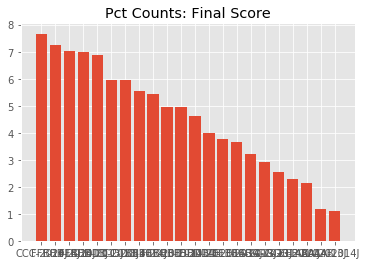

In [56]:
fig, ax = plt.subplots()

series = df_studentInfo['module_presentation'].value_counts(normalize=True) * 100
ax.bar(x = series.index, height = series.values)

ax.set_title('Pct Counts: Final Score')
plt.show()

In [57]:
df_studentInfo['module_presentation'].value_counts(normalize=True) * 100

CCC-2014J    7.664222
FFF-2014J    7.256159
BBB-2014J    7.032185
FFF-2013J    7.004572
BBB-2013J    6.863437
DDD-2013J    5.946062
CCC-2014B    5.939926
DDD-2014J    5.531863
BBB-2013B    5.421410
FFF-2013B    4.951984
BBB-2014B    4.948915
FFF-2014B    4.602215
DDD-2013B    3.997791
DDD-2014B    3.767680
EEE-2014J    3.644954
EEE-2013J    3.227687
GGG-2013J    2.920873
GGG-2014B    2.555764
GGG-2014J    2.298039
EEE-2014B    2.129292
AAA-2013J    1.175099
AAA-2014J    1.119872
Name: module_presentation, dtype: float64

#### Visualizing frequency of Demographic Vars - In Absolute and Pct terms

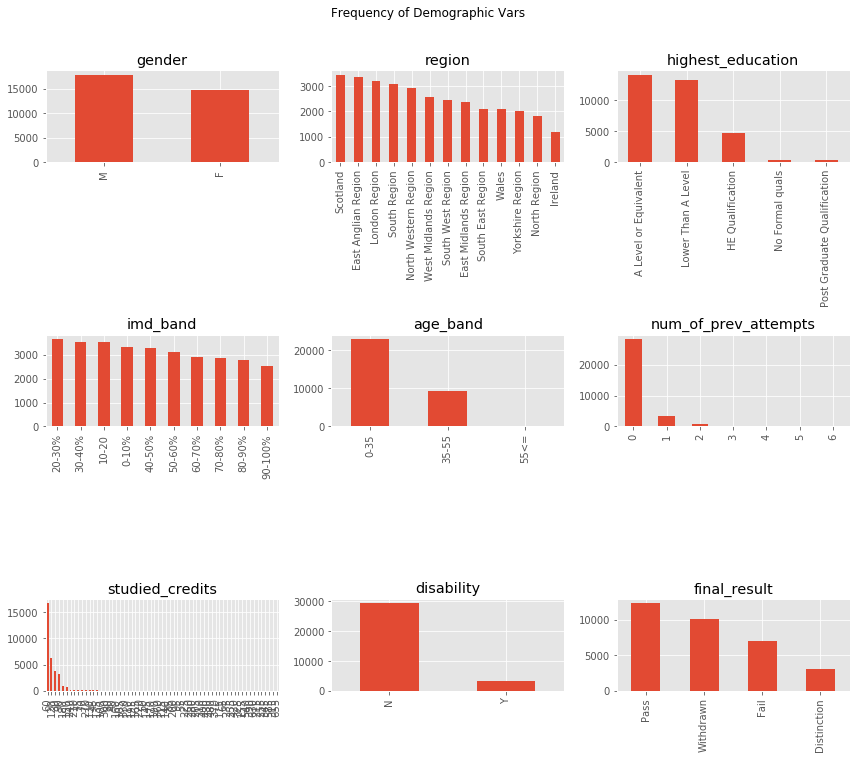

In [58]:
fig, axs = plt.subplots(3,3, figsize = (12,10))
fig.suptitle('Frequency of Demographic Vars', x = 0.5, y = 1.05)

for i, ax in enumerate(axs.flatten()):
    df_studentInfo[cols[i]].value_counts().plot(kind='bar',title=cols[i], ax=ax)
    
plt.tight_layout();

In [59]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

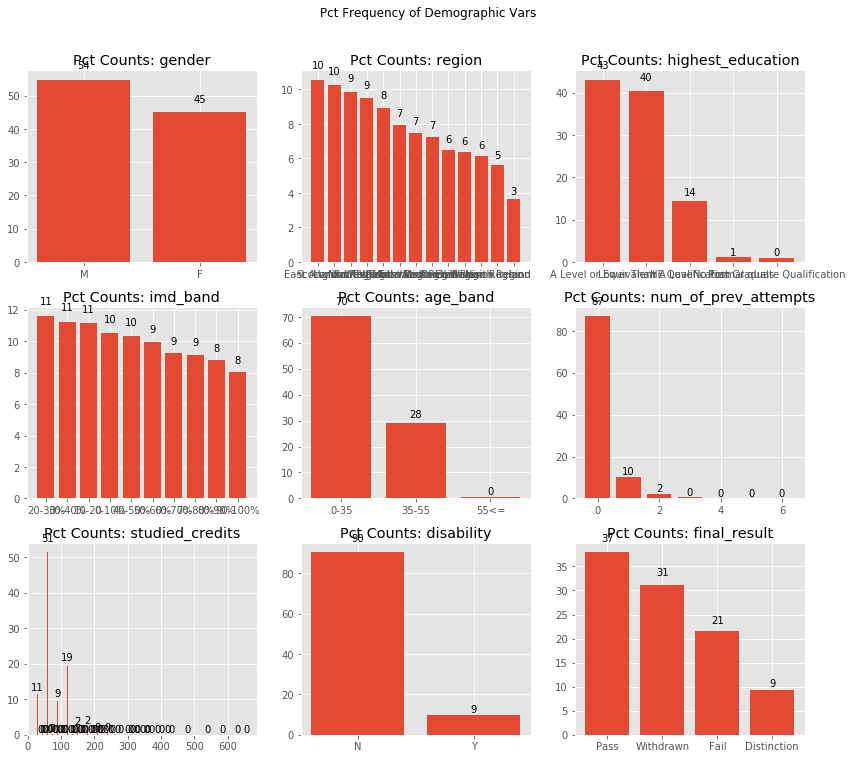

In [60]:
cols = ['gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result']
fig, axs = plt.subplots(3,3, figsize = (12,10))
fig.suptitle('Pct Frequency of Demographic Vars', x = 0.5, y = 1.05)

for i, ax in enumerate(axs.flatten()):
    
    series = df_studentInfo[cols[i]].value_counts(normalize=True) * 100
    
    rects = ax.bar(x = series.index, height = series.values)
    autolabel(rects)
    ax.set_title(f'Pct Counts: {cols[i]}')
    

plt.tight_layout();


In [61]:
df_studentInfo['studied_credits'].value_counts(normalize=True) * 100

60     51.394471
120    19.415212
30     11.502470
90      9.646243
180     2.546559
         ...    
255     0.003068
345     0.003068
585     0.003068
315     0.003068
655     0.003068
Name: studied_credits, Length: 61, dtype: float64

#### Visualizing frequency of Demographic Vars vs. Final Score - In Absolute and Pct terms

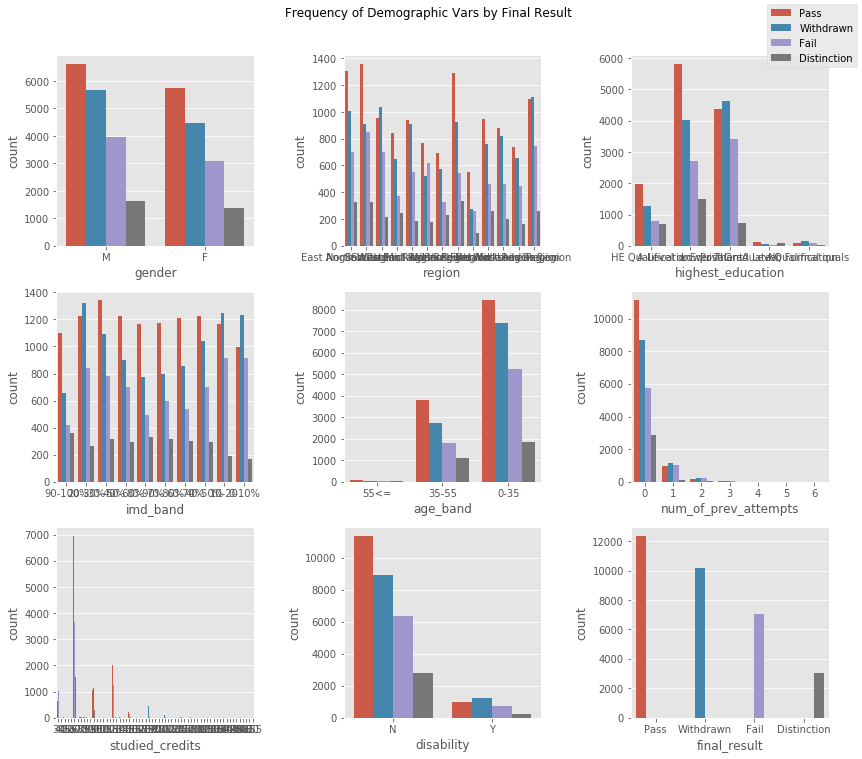

In [62]:
fig, axs = plt.subplots(3,3, figsize = (12,10))
fig.suptitle('Frequency of Demographic Vars by Final Result', x = 0.5, y = 1.05)
for i, ax in enumerate(axs.flatten()):
    sns.countplot(x=cols[i], hue="final_result", data=df_studentInfo , ax=ax)
    ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
             
fig.legend(handles, labels, loc='upper right')
plt.tight_layout();

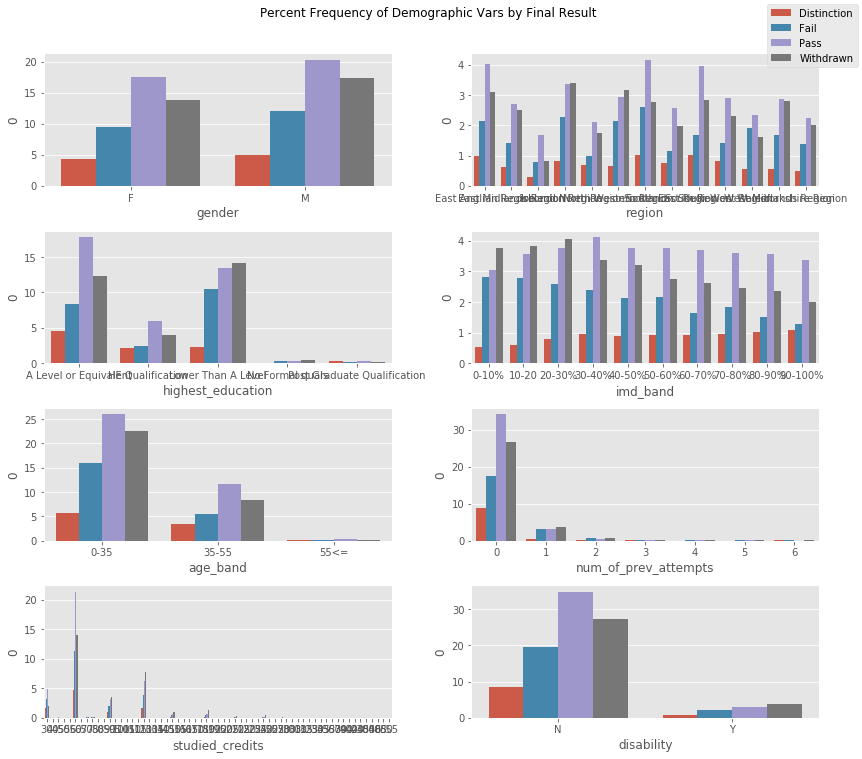

In [63]:
fig, axs = plt.subplots(4,2, figsize = (12,10))
fig.suptitle('Percent Frequency of Demographic Vars by Final Result', x = 0.5, y = 1.05)

for i, ax in enumerate(axs.flatten()):
    x = pd.crosstab(index=df_studentInfo[cols[i]], columns=df_studentInfo['final_result']).stack()/len(df_studentInfo)*100
    x = x.reset_index()
    sns.barplot(x=x[cols[i]], y=x[0], hue=x.final_result, ax = ax)
    ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
             
fig.legend(handles, labels, loc='upper right')
    
plt.tight_layout();





In [64]:
mask = (df_studentInfo.final_result == 'Pass') | (df_studentInfo.final_result == 'Distinction')

In [65]:
df_studentInfo['final_result_edit'] = np.where(mask, 'Pass', 'Fail')

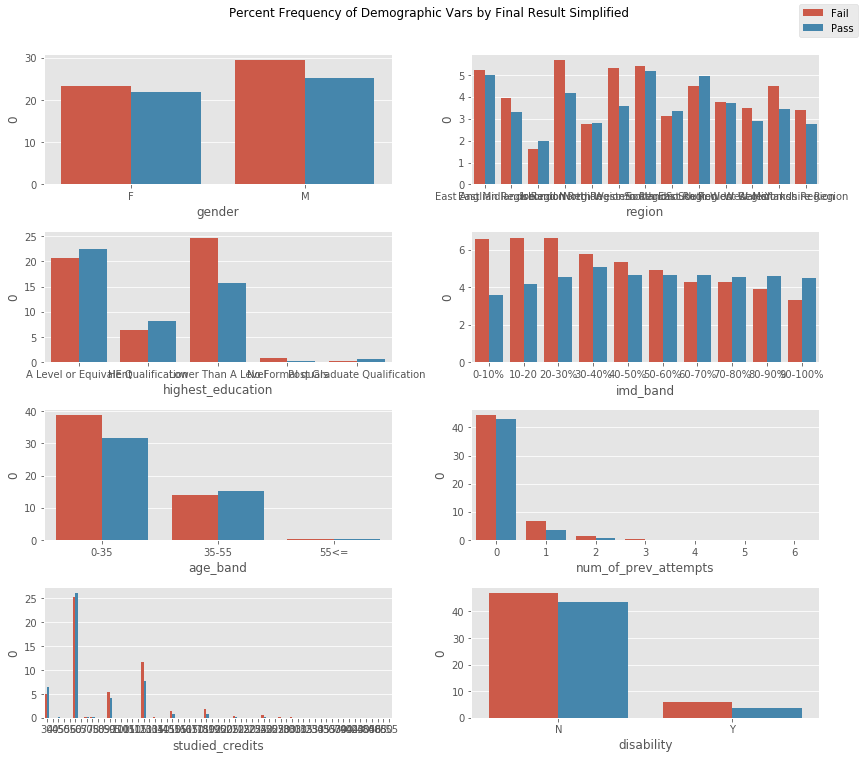

In [66]:
fig, axs = plt.subplots(4,2, figsize = (12,10))
fig.suptitle('Percent Frequency of Demographic Vars by Final Result Simplified', x = 0.5, y = 1.05)

for i, ax in enumerate(axs.flatten()):
    x = pd.crosstab(index=df_studentInfo[cols[i]], columns=df_studentInfo['final_result_edit']).stack()/len(df_studentInfo)*100
    x = x.reset_index()
    sns.barplot(x=x[cols[i]], y=x[0], hue=x.final_result_edit, ax = ax)
    ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
             
fig.legend(handles, labels, loc='upper right')
    
plt.tight_layout();

In [67]:
for i in range(len(cols)):
    y = pd.crosstab(index=df_studentInfo[cols[i]], columns=df_studentInfo['final_result_edit']).stack()/len(df_studentInfo)*100
    print(y.reset_index())


  gender final_result_edit          0
0      F              Fail  23.284141
1      F              Pass  21.872795
2      M              Fail  29.512472
3      M              Pass  25.330592
                  region final_result_edit         0
0    East Anglian Region              Fail  5.228116
1    East Anglian Region              Pass  5.019483
2   East Midlands Region              Fail  3.939496
3   East Midlands Region              Pass  3.316663
4                Ireland              Fail  1.638389
5                Ireland              Pass  1.994293
6          London Region              Fail  5.688338
7          London Region              Pass  4.178811
8           North Region              Fail  2.767465
9           North Region              Pass  2.825760
10  North Western Region              Fail  5.332433
11  North Western Region              Pass  3.583592
12              Scotland              Fail  5.396864
13              Scotland              Pass  5.175958
14     South Ea

In [97]:
df_studentInfo.to_csv('data/studentInfo_2.csv')

* Most students in dataset only took 1 Module-Presentation(84%)
* 11% of students took 2
* Most taken Module-Presentations were CCC-2014J and FFF-2014J (7%+ each). 
* Least taken Module-Presentations were AAA-2013J and AAA-2014J (<1.2% each)


* 8 Demographic Vars given
* Gender: 54% M, 46% F
* Region: Scotland and East Anglian region (10%+ each), London Region (9.8%). Least is Ireland (3.6%)
* Highest Education: A Level or Equivalent - 43%. Lower than A level - 40%. HE Qualification - 14%
* (https://www.quora.com/What-is-the-American-equivalent-of-A-Level)
* (https://universitycompare.com/advice/student/what-is-a-certificate-of-higher-education/)
* IMD Band: Lowest bands are the highest (10% each), but all are close) 
* Age Band: 70% in 0-35, 28% in 35-55
* Num of Previous Attempts: 0 == 87%
* Studied credits: 60 credits is the most frequent - 51%. 120 credits is 20%, 30 credits is 11, and 90 is 9%
* Disability: 90% No


* Final Result - 37% Pass, 31% Withdraw, 21% Fail, 9% Distinction
* If I change Final_Result to Pass = Pass+Distinction and Fail = Fail+Withdrawn, then Id have close to a balanced class


* Relationship within Demographic vars
* Gender: 54% M, 46% F
* Region: Scotland and East Anglian region (10%+ each), London Region (9.8%). Least is Ireland (3.6%)
* Highest Education: A Level or Equivalent - 43%. Lower than A level - 40%. HE Qualification - 14%
* (https://www.quora.com/What-is-the-American-equivalent-of-A-Level)
* (https://universitycompare.com/advice/student/what-is-a-certificate-of-higher-education/)
* IMD Band: Lowest bands are the highest (10% each), but all are close) 
* Age Band: 70% in 0-35, 28% in 35-55
* Num of Previous Attempts: 0 == 87%
* Studied credits: 60 credits is the most frequent - 51%. 120 credits is 20%, 30 credits is 11, and 90 is 9%
* Disability: 90% No


* Relationship b/w Demographic vars and Final Result
* Men have slightly higher Pass/Distinction rate than Females (25 vs. 21%)
* Pass/Fail rates do vary a bit by region - largest discrepancy is in London: 5.6% fail vs. 4.1% pass
* More education qualification --> higher pass rate
* higher Imd bands --> higher pass rate
* lower pass rates if you've taken the course before.
* lower pass rates for those with disability
* Higher pass rates for smaller credit courses


### 5 - studentRegistration
* What is the avg number of days to register per student?
* How many students unregistered from a module-presentation?
* What is the % of registered/Total Registrations and also unregistered/Total Registrations?

In [68]:
df_studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22460910>]],
      dtype=object)

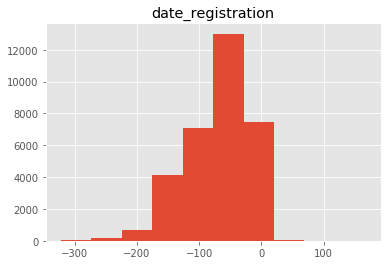

In [69]:
df_studentRegistration.hist(column = 'date_registration')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a329bd0>]],
      dtype=object)

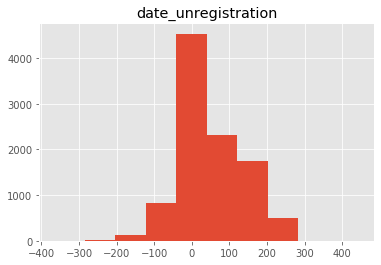

In [70]:
df_studentRegistration.hist(column = 'date_unregistration')

In [71]:
df_studentRegistration.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [72]:
np.sum(pd.notnull(df_studentRegistration.date_unregistration))/len(df_studentRegistration)

0.30902340993464855

In [73]:
np.sum(pd.isnull(df_studentRegistration.date_unregistration))/len(df_studentRegistration)

0.6909765900653515

* 70% of time, Students stay registered. 30% they unregister
* 60 days before course starts is avg/median time students tend to register
* Median is 27 days for unregistration to take place from start date. Avg is 50.

### 6 - studentAssessment
* How many on-time vs. late submissions are there?
* What is the average score split by on-time and late submissions?
* What % of assessments are "banked" i.e. if the assessment result was transferred from a previous presentation/
* What pct is Num Fails (<40 Score) to total Assessments

In [74]:
df_studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [75]:
df_studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


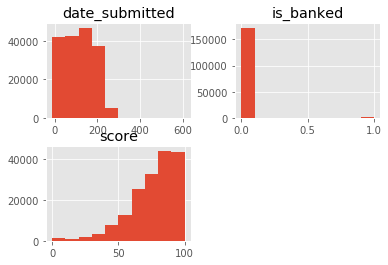

In [76]:
df_studentAssessment.hist(column = ['date_submitted','is_banked','score']);

In [77]:
df_studentAssessment.groupby('id_assessment').mean()['date_submitted']

id_assessment
1752      19.356546
1753      55.959064
1754     117.235650
1755     167.303630
1756     214.543624
            ...    
37439    157.611111
37440    177.400835
37441    208.338266
37442    212.151442
37443    221.572674
Name: date_submitted, Length: 188, dtype: float64

In [78]:
df_studentAssessment.groupby('id_assessment').std()['date_submitted'].sort_values()

id_assessment
24288     0.034524
24289     0.037635
14995     0.101710
24287     0.258666
24286     0.305635
           ...    
34891    80.333240
34879    81.731784
34878    82.169847
34866    82.231145
34865    86.083984
Name: date_submitted, Length: 188, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20533090>]],
      dtype=object)

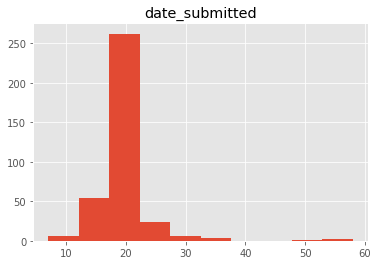

In [79]:
df_studentAssessment[df_studentAssessment.id_assessment	 == 1752].hist(column = 'date_submitted')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21681910>]],
      dtype=object)

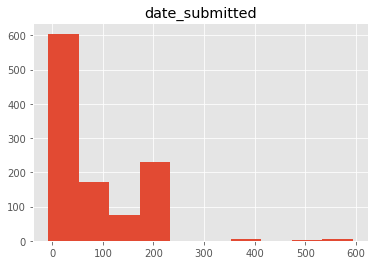

In [80]:
df_studentAssessment[df_studentAssessment.id_assessment	 == 34865].hist(column = 'date_submitted')

In [81]:
np.sum(pd.isnull(df_studentRegistration.date_unregistration))/len(df_studentRegistration)

0.6909765900653515

In [82]:
np.sum(df_studentAssessment.score<=40)/len(df_studentAssessment)

0.05487832926997562

* Some Assessments have a very small std deviation in submission times, while others have a wide range (80 days)
* Submissions usually occur 116 days after course starts
* 5% of assessments are failed (<= 40 score)
* Avg assessment score is 75, median is 80
* Only 1 % of assessments are banked (carried over)

### 7 - studentVle
* Can students have multiple rows per a singular Vle due to tracking their interaction with it by day?
* How many clicks are there per Student per VLE
* How many clicks per student per day are there per VLE
* Plot Usage vs. Date

In [83]:
df_studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [84]:
df_studentVle.groupby('id_student').size().sort_values(ascending = False)

id_student
537811     6389
2088765    5240
298040     4978
630905     4916
2063578    4518
           ... 
646891        1
555178        1
336277        1
686852        1
488198        1
Length: 26074, dtype: int64

In [85]:
df_studentVle.groupby(['id_student','id_site','date']).size().sort_values(ascending = False)

id_student  id_site  date
2577893     790866   143     10
650770      973720   157     10
654397      973720   157     10
525625      973720   165     10
2569834     551072   156     10
                             ..
614471      813701   88       1
                     99       1
                     103      1
                     106      1
587550      909013   79       1
Length: 8459320, dtype: int64

In [86]:
mask = (df_studentVle.id_student == 2577893) & \
(df_studentVle.id_site == 790866) & \
(df_studentVle.date == 143)

df_studentVle[mask]

,code_module,code_presentation,id_student,id_site,date,sum_click
5798808,EEE,2014B,2577893,790866,143,37
5798809,EEE,2014B,2577893,790866,143,7
5798811,EEE,2014B,2577893,790866,143,1
5798820,EEE,2014B,2577893,790866,143,224
5798821,EEE,2014B,2577893,790866,143,20
5798860,EEE,2014B,2577893,790866,143,20
5798863,EEE,2014B,2577893,790866,143,3
5798866,EEE,2014B,2577893,790866,143,1
5798867,EEE,2014B,2577893,790866,143,46
5798868,EEE,2014B,2577893,790866,143,1


In [87]:
x = df_studentVle.groupby(['id_student','id_site','code_presentation','code_module','date'])
y = x.sum()
df_studentVle_by_day = y.reset_index()

In [88]:
x = df_studentVle.groupby(['id_student','id_site','code_presentation','code_module'])
y = x.sum()
df_studentVle_by_vle = y.reset_index()

In [89]:
df_studentVle_by_day.to_csv('data/studentVle_by_day.csv')


In [90]:
df_studentVle_by_vle.to_csv('data/studentVle_by_vle.csv')


In [91]:
len(df_studentVle_by_day)   

8459320

In [92]:
len(df_studentVle_by_vle)

1960496

In [93]:
df_studentVle_by_vle

,id_student,id_site,code_presentation,code_module,date,sum_click
0,6516,877011,2014J,AAA,1262,23
1,6516,877012,2014J,AAA,11990,305
2,6516,877015,2014J,AAA,1475,26
3,6516,877023,2014J,AAA,368,6
4,6516,877025,2014J,AAA,864,91
...,...,...,...,...,...,...
1960491,2698588,951619,2014J,BBB,233,1
1960492,2698588,951621,2014J,BBB,692,3
1960493,2698588,951623,2014J,BBB,464,2
1960494,2698588,985230,2014J,BBB,637,15


In [94]:
df_studentVle_by_vle.describe()

,id_student,id_site,date,sum_click
count,1.960496e+06,1.960496e+06,1.960496e+06,1.960496e+06
mean,7.270676e+05,7.382757e+05,5.172699e+02,2.020157e+01
std,5.776792e+05,1.307539e+05,1.682351e+03,7.920128e+01
min,6.516000e+03,5.267210e+05,-6.200000e+02,1.000000e+00
25%,5.045970e+05,6.739710e+05,3.900000e+01,1.000000e+00
50%,5.871400e+05,7.300770e+05,1.510000e+02,3.000000e+00
75%,6.459480e+05,8.770450e+05,4.010000e+02,1.100000e+01
max,2.698588e+06,1.049562e+06,7.002600e+04,8.837000e+03


In [95]:
DataFrame.boxplot(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)[source]

NameError: name 'DataFrame' is not defined

In [ ]:
df_studentVle_by_vle.hist(column = 'sum_click')
plt.xlim(0,1000)


In [ ]:
df_studentVle_by_vle.boxplot(column = 'sum_click')

In [ ]:
mask = df_studentVle_by_vle['sum_click'] <=10

In [ ]:
df_studentVle_by_vle[mask]

In [ ]:
sns.distplot(df_studentVle_by_vle[mask]['sum_click']);

In [ ]:
df_studentVle_by_day.describe()

* Created two dfs (df_studentVle_by_day) and (df_studentVle_by_vle) to show aggregated clicks by VLE by student and also by Day by VLE by Student
* avg clicks per VLE is 20, median is 3. Lots of outliers due to max value being close to 9k
* avg clicks per VLE per Day is 4, median is 2. Lots of outliers due to max being just under 7k